In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()



if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

# Reference
https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

# Using 3*3 ConvNet, Optimizer 'AdaDelta'

In [10]:
model = Sequential()
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 512)       5120      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 256)       1179904   
_________________________________________________________________
flatten_4 (Flatten)          (None, 173056)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               22151296  
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 23,337,610
Trainable params: 23,337,610
Non-trainable params: 0
_________________________________________________________________


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 50s 829us/step - loss: 0.1386 - acc: 0.9589 - val_loss: 0.0469 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 46s 765us/step - loss: 0.0376 - acc: 0.9880 - val_loss: 0.0432 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 46s 768us/step - loss: 0.0194 - acc: 0.9937 - val_loss: 0.0406 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 46s 761us/step - loss: 0.0129 - acc: 0.9960 - val_loss: 0.0464 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0446 - val_acc: 0.9884
Epoch 6/12
60000/60000 [==============================] - 46s 758us/step - loss: 0.0090 - acc: 0.9970 - val_loss: 0.0469 - val_acc: 0.9876
Epoch 7/12
60000/60000 [==============================] - 45s 756us/step - loss: 0.0074 - acc: 0.9976 - val_loss: 0.

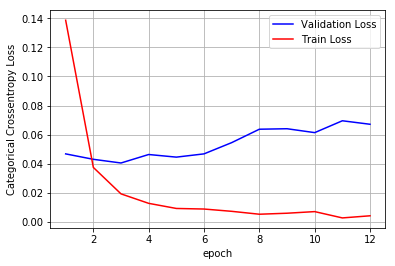

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating Model

We can clearly see that our model is **overfitting**. If we kept filter width large at initial stage then model tends to **Overfit**, 

Now we will try with less number of filter at initial stage and gradually increasing the same.

In [0]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
          
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 5, 5, 16)          64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 16)          0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.3755 - acc: 0.8907 - val_loss: 0.0954 - val_acc: 0.9699
Epoch 2/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.1209 - acc: 0.9630 - val_loss: 0.0673 - val_acc: 0.9810
Epoch 3/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0898 - acc: 0.9718 - val_loss: 0.0647 - val_acc: 0.9788
Epoch 4/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.0807 - acc: 0.9749 - val_loss: 0.0552 - val_acc: 0.9823
Epoch 5/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0706 - acc: 0.9776 - val_loss: 0.0474 - val_acc: 0.9854
Epoch 6/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0626 - acc: 0.9805 - val_loss: 0.0423 - val_acc: 0.9867
Epoch 7/12
60000/60000 [==============================] - 4s 63us/step - loss: 0.0594 - acc: 0.9811 - val_loss: 0.0455 - val_acc

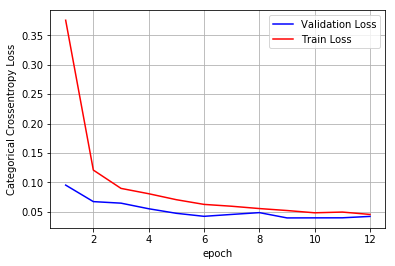

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating Model

We can clearly observe that we initially we kept filter size is less and gradually increasing gives our perfect model.

Model is not overfitting.

# 5*5 ConvNet, Optimizer 'ADAM'

In [20]:
model = Sequential()

#1st laeyr
model.add(Conv2D(1, kernel_size=(5, 5),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.10))


# 2nd layer
model.add(Conv2D(2, kernel_size=(5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 1)         26        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 1)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 2)         52        
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 2)           0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 50)                0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 70us/step - loss: 1.9163 - acc: 0.3024 - val_loss: 1.2200 - val_acc: 0.5752
Epoch 2/12
60000/60000 [==============================] - 3s 47us/step - loss: 1.2467 - acc: 0.5540 - val_loss: 0.8910 - val_acc: 0.7004
Epoch 3/12
60000/60000 [==============================] - 3s 45us/step - loss: 1.0484 - acc: 0.6328 - val_loss: 0.7254 - val_acc: 0.7819
Epoch 4/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.9283 - acc: 0.6795 - val_loss: 0.6387 - val_acc: 0.8051
Epoch 5/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.8530 - acc: 0.7091 - val_loss: 0.5656 - val_acc: 0.8296
Epoch 6/12
60000/60000 [==============================] - 3s 45us/step - loss: 0.8090 - acc: 0.7254 - val_loss: 0.5413 - val_acc: 0.8403
Epoch 7/12
60000/60000 [==============================] - 3s 45us/step - loss: 0.7784 - acc: 0.7375 - val_loss: 0.5165 - val_acc

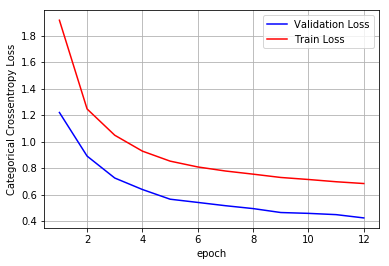

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating Model

As we observe training error is large and validation error is small way smaller then model is **underfit**. We have used extremely small number of filters, which cause model tends to underfit.

How we will increase slightly number of filters ie increasing filter width

In [36]:
model = Sequential()

#1st laeyr
model.add(Conv2D(8, kernel_size=(5, 5),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.10))


# 2nd layer
model.add(Conv2D(16, kernel_size=(5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 400)               0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.3559 - acc: 0.8856 - val_loss: 0.0775 - val_acc: 0.9745
Epoch 2/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.1058 - acc: 0.9670 - val_loss: 0.0519 - val_acc: 0.9829
Epoch 3/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0779 - acc: 0.9755 - val_loss: 0.0447 - val_acc: 0.9859
Epoch 4/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0647 - acc: 0.9801 - val_loss: 0.0373 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0568 - acc: 0.9820 - val_loss: 0.0366 - val_acc: 0.9882
Epoch 6/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0493 - acc: 0.9844 - val_loss: 0.0330 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0456 - acc: 0.9851 - val_loss: 0.0295 - val_ac

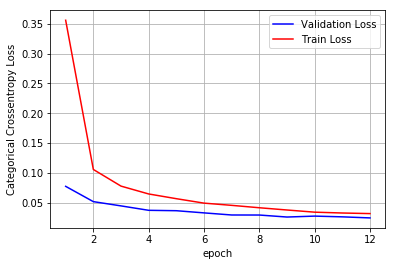

In [37]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 7*7 ConvNet, Optimizer 'Adam'

In [38]:
model = Sequential()

# 1st layer
model.add(Conv2D(16, kernel_size=(7, 7),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3),strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.15))


# 2nd layer
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3 ),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(3200, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_33 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 20, 20, 32)        25120     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 9, 9, 32)          128       
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 208us/step - loss: 0.1354 - acc: 0.9626 - val_loss: 0.0759 - val_acc: 0.9770
Epoch 2/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0528 - acc: 0.9850 - val_loss: 0.0564 - val_acc: 0.9849
Epoch 3/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0405 - acc: 0.9891 - val_loss: 0.0361 - val_acc: 0.9904
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0339 - acc: 0.9907 - val_loss: 0.0460 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0301 - acc: 0.9917 - val_loss: 0.0358 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0251 - acc: 0.9927 - val_loss: 0.0306 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0235 - acc: 0.9933 - val_loss: 0.0399 -

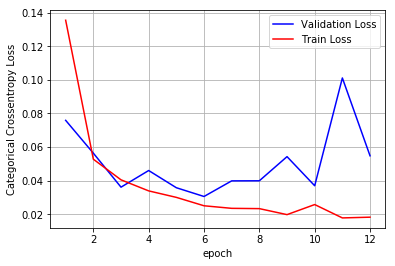

In [39]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating Model

It can be observe that model is overfitting because we have used Max Pooling matrices (3,3) , for ConvNet ( 7,7 ).


We have using 2*2 matrics for Max Pooling.

In [40]:
model = Sequential()

# 1st layer
model.add(Conv2D(16, kernel_size=(7, 7),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.15))


# 2nd layer
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2 ),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(3200, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 27, 27, 16)        64        
_________________________________________________________________
dropout_35 (Dropout)         (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 21, 21, 32)        25120     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 10, 10, 32)        128       
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 231us/step - loss: 0.1416 - acc: 0.9612 - val_loss: 0.0499 - val_acc: 0.9842
Epoch 2/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0563 - acc: 0.9841 - val_loss: 0.0440 - val_acc: 0.9883
Epoch 3/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0409 - acc: 0.9884 - val_loss: 0.0557 - val_acc: 0.9846
Epoch 4/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.0289 - acc: 0.9917 - val_loss: 0.0445 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0273 - acc: 0.9925 - val_loss: 0.0384 - val_acc: 0.9907
Epoch 6/12
60000/60000 [==============================] - 10s 174us/step - loss: 0.0279 - acc: 0.9924 - val_loss: 0.0515 - val_acc: 0.9883
Epoch 7/12
60000/60000 [==============================] - 10s 173us/step - loss: 0.0280 - acc: 0.9923 - val_loss: 0.

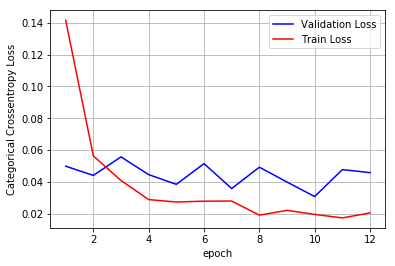

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating model

It can be observe that, it is better than previous one, But can we experiment on dense layer?

In [42]:
model = Sequential()

# 1st layer
model.add(Conv2D(16, kernel_size=(7, 7),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.15))


# 2nd layer
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2 ),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(400, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 27, 27, 16)        64        
_________________________________________________________________
dropout_37 (Dropout)         (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 21, 21, 32)        25120     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 10, 10, 32)        128       
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.1133 - acc: 0.9667 - val_loss: 0.0389 - val_acc: 0.9879
Epoch 2/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0427 - acc: 0.9869 - val_loss: 0.0346 - val_acc: 0.9893
Epoch 3/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0297 - acc: 0.9913 - val_loss: 0.0292 - val_acc: 0.9909
Epoch 4/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.0226 - acc: 0.9928 - val_loss: 0.0284 - val_acc: 0.9911
Epoch 5/12
60000/60000 [==============================] - 6s 94us/step - loss: 0.0220 - acc: 0.9932 - val_loss: 0.0382 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0443 - val_acc: 0.9888
Epoch 7/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.0179 - acc: 0.9947 - val_loss: 0.0473 - val_ac

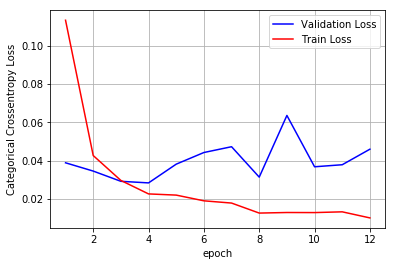

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating Model

It can be observe that if kept single dense layer after flatten operation model start overfitting.

Adding more Dense layer after flatten layer.

In [44]:
model = Sequential()

# 1st layer
model.add(Conv2D(16, kernel_size=(7, 7),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(BatchNormalization())


# 2nd layer
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2 ),strides=2))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(3200, activation='relu'))
model.add(Dense(1600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 27, 27, 16)        64        
_________________________________________________________________
dropout_39 (Dropout)         (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 21, 21, 32)        25120     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 10, 10, 32)        128       
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 271us/step - loss: 0.1666 - acc: 0.9560 - val_loss: 0.0574 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0565 - acc: 0.9846 - val_loss: 0.0385 - val_acc: 0.9901
Epoch 3/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0418 - acc: 0.9886 - val_loss: 0.0391 - val_acc: 0.9903
Epoch 4/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.0353 - acc: 0.9909 - val_loss: 0.0543 - val_acc: 0.9857
Epoch 5/12
60000/60000 [==============================] - 12s 203us/step - loss: 0.0351 - acc: 0.9910 - val_loss: 0.0398 - val_acc: 0.9901
Epoch 6/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0311 - acc: 0.9924 - val_loss: 0.0411 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.0270 - acc: 0.9930 - val_loss: 0.

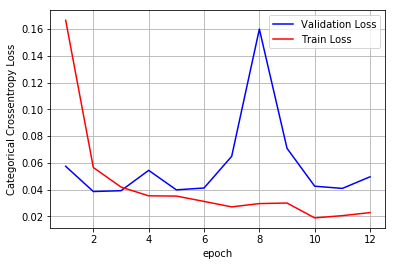

In [45]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Evaluating Model

Its highly Overfitting we can introduce drop out layer to reduce the overfit

In [66]:
model = Sequential()

# 1st layer
model.add(Conv2D(16, kernel_size=(7, 7),activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=1))
model.add(Dropout(0.50))


# 2nd layer
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.33))


model.add(Flatten())
model.add(Dense(1600, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 28, 28, 16)        800       
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 27, 27, 16)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 21, 21, 32)        25120     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 3200)              0         
__________

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 217us/step - loss: 0.1971 - acc: 0.9373 - val_loss: 0.0556 - val_acc: 0.9839
Epoch 2/12
60000/60000 [==============================] - 8s 128us/step - loss: 0.0603 - acc: 0.9821 - val_loss: 0.0403 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0436 - acc: 0.9867 - val_loss: 0.0342 - val_acc: 0.9899
Epoch 4/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0358 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 7s 125us/step - loss: 0.0322 - acc: 0.9907 - val_loss: 0.0278 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 8s 125us/step - loss: 0.0287 - acc: 0.9914 - val_loss: 0.0293 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 7s 125us/step - loss: 0.0245 - acc: 0.9928 - val_loss: 0.0245 -

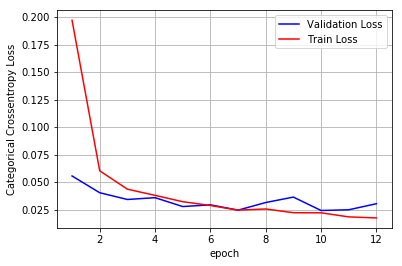

In [67]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

In [68]:
import pandas as pd
from prettytable import PrettyTable

bold = '\033[1m'
end = '\033[0m'


print(bold+'\t\t\t Convolutional Neural Network  '+end)


x = PrettyTable()
x.field_names =  ['Metric','3*3 ConvNet','5*5 ConvNet', '7*7 Convnet']
x.add_row(["Optimizer ", 'AdaDelta','ADAM','ADAM'])

        
x.add_row(["Train Accuracy ", 0.9857,0.9896,0.9952])
x.add_row(["Train Loss ", 0.0455,0.0318,0.0174])
x.add_row(["Test Accuracy ",0.9877,0.9916,0.9919])
x.add_row(["Test Loss ", 0.0422,0.0246,0.0304])


print('\n')
print(x)


			 Convolutional Neural Network  


+-----------------+-------------+-------------+-------------+
|      Metric     | 3*3 ConvNet | 5*5 ConvNet | 7*7 Convnet |
+-----------------+-------------+-------------+-------------+
|    Optimizer    |   AdaDelta  |     ADAM    |     ADAM    |
| Train Accuracy  |    0.9857   |    0.9896   |    0.9952   |
|   Train Loss    |    0.0455   |    0.0318   |    0.0174   |
|  Test Accuracy  |    0.9877   |    0.9916   |    0.9919   |
|    Test Loss    |    0.0422   |    0.0246   |    0.0304   |
+-----------------+-------------+-------------+-------------+


# Summary 


1.Always start by using smaller filters is to collect as much local information as possible, and      then gradually increase the filter width to reduce the generated feature space width to represent more global, high-level and representative information


2. Large filter size at begining cause OVERFIT a model.

3. Smaller filter size causee UNDERFIT a model.

4. Additing Drop out layer can reduce overfitting of model.

5. using Sigmoid activation layer was worst output for above specific architecture.

6. Adding dense layer after flatten layer is important, It will change out dramatically

7. Larger and Complex Model take more time to train the model.
